#### Table Replication  
Use predefined SQL table copies to partion and cluster new tables

In [1]:
import bq, config
from google.cloud import bigquery

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("darkgrid")

In [4]:
project = "tpc-benchmarking-9432"

In [5]:
client = bigquery.Client.from_service_account_json(config.gcp_cred_file)
datasets = list(client.list_datasets())
dataset_ids = [d.dataset_id for d in datasets]

In [50]:
def to_df(d):
    df = pd.DataFrame(d, columns=["table", "column", "unique", "total"])
    df["cardinality"] = df.unique / df.total
    df["table_column"] = df.table + " " + df.column
    df["dataset"] = dataset
    df["test"] = test
    df.index = df.table_column
    df.to_csv(csv_fp)
    return csv_fp

In [47]:
def plot_cardinality(df, test, dataset):
    dfx = df.copy()
    dfx.index = dfx.table_column
    for table in dfx.table.unique():
        _df = dfx.loc[dfx.table == table]
        x = len(_df.table_column)
        ax = _df[["table_column", "cardinality"]].plot.barh(color="green", legend=None, figsize=(4,0.25*x));
        ax.set_xlabel("Cardinality")
        ax.set_ylabel(None);
        plt.title(test + " | " + dataset + " | " + table)
        fp = config.fp_results + config.sep + dataset + "_" + table + "card.png"
        plt.savefig(fname=fp, bbox_inches="tight")
        plt.show()

### TPC-H

In [ ]:
test_h = "TPC-DH"
dataset_h = "h_100GB_01"

In [21]:
%%time
d_h = bq.collect_cardinality(project=project,
                             dataset=dataset)

CPU times: user 1min 2s, sys: 2.08 s, total: 1min 4s
Wall time: 22min 38s


In [ ]:
csv_fp_h = to_df(d_h)
csv_fp_h

### TPC-DS

In [ ]:
test_ds = "TPC-DS"
dataset_ds = "ds_100GB_01"

In [21]:
%%time
d_ds = bq.collect_cardinality(project=project,
                              dataset=dataset)

CPU times: user 1min 2s, sys: 2.08 s, total: 1min 4s
Wall time: 22min 38s


In [ ]:
csv_fp_ds = to_df(d_ds)
csv_fp_ds

### Load CSV Data and Plot

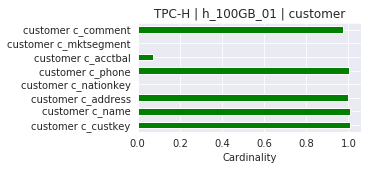

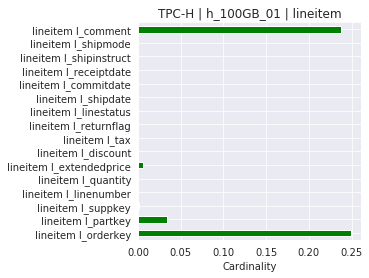

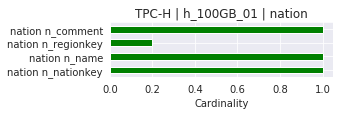

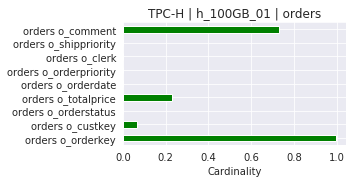

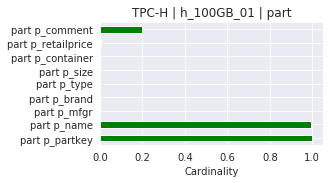

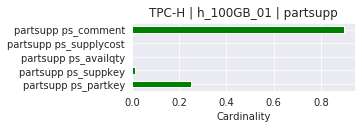

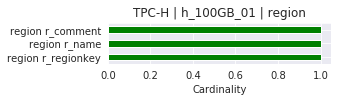

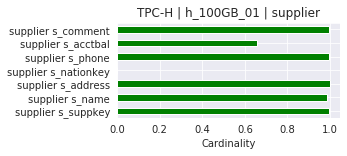

In [55]:
dataset_h = "h_100GB_01"
csv_fp_h = "./results/h_100GB_01_cardinality.csv"
df_h = pd.read_csv(csv_fp_h)
plot_cardinality(df=df_h, test="TPC-H", dataset=dataset_h)

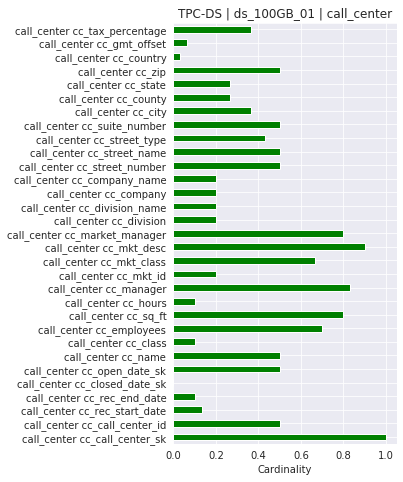

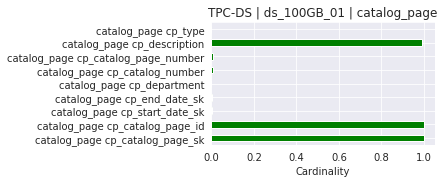

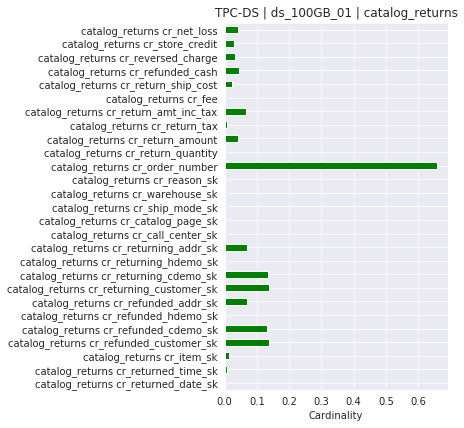

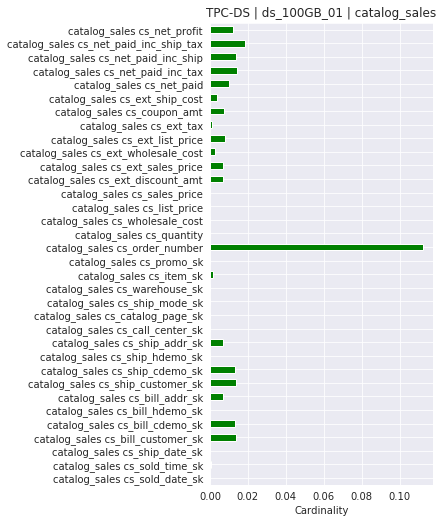

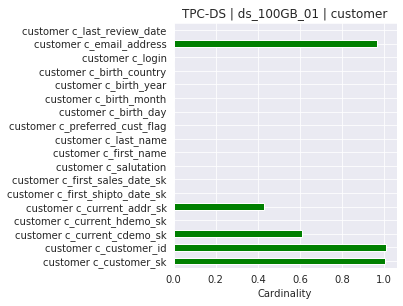

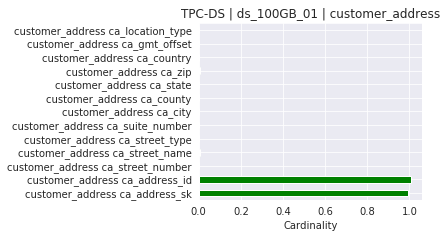

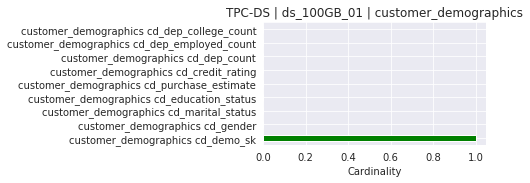

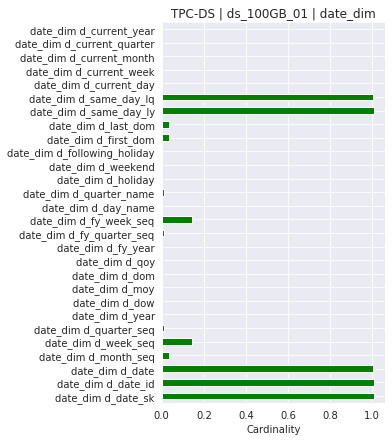

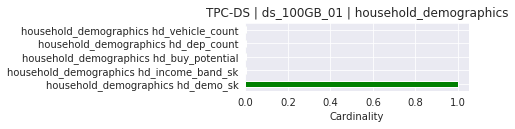

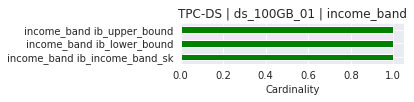

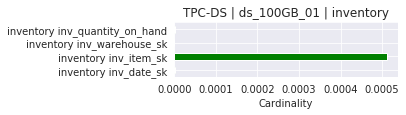

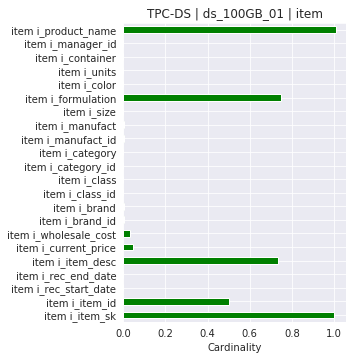

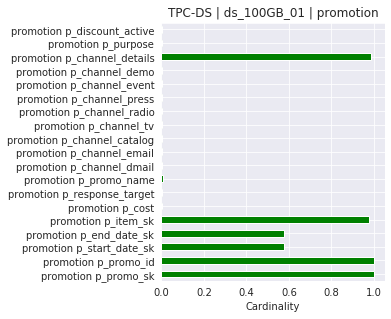

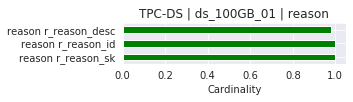

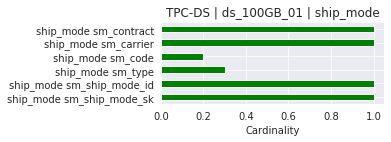

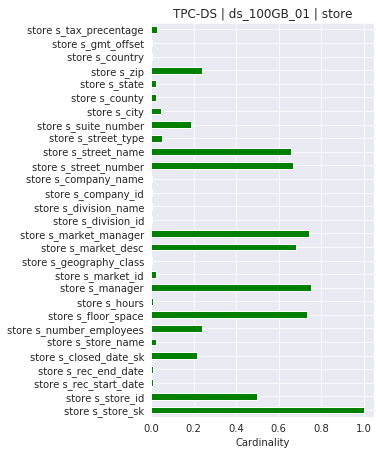

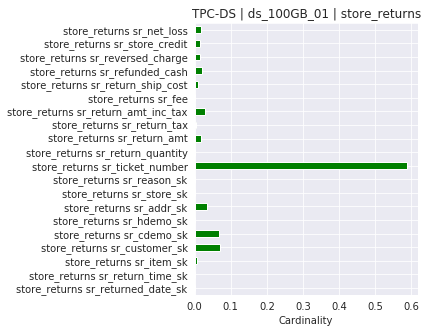

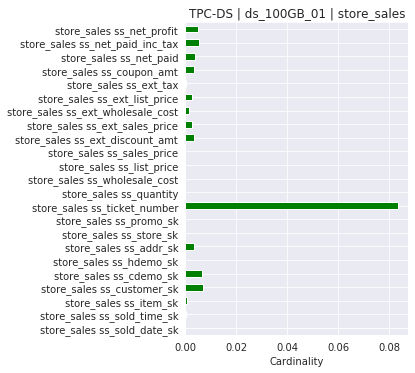

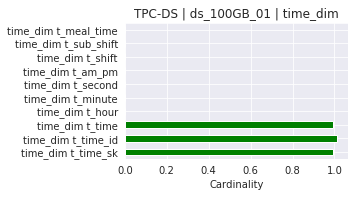

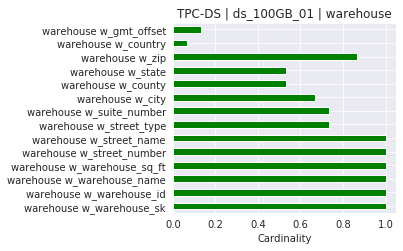

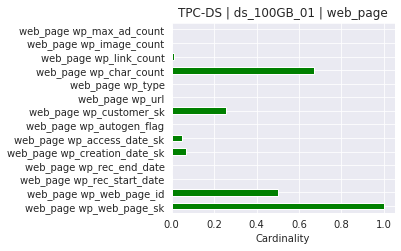

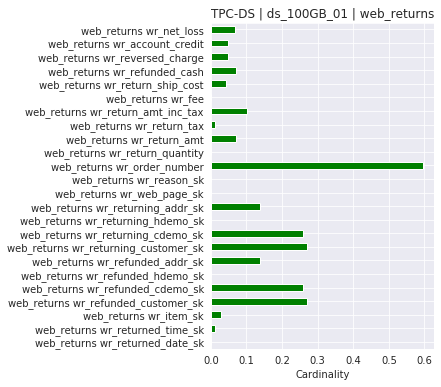

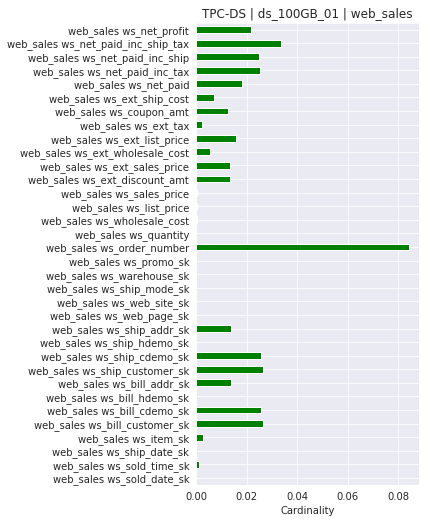

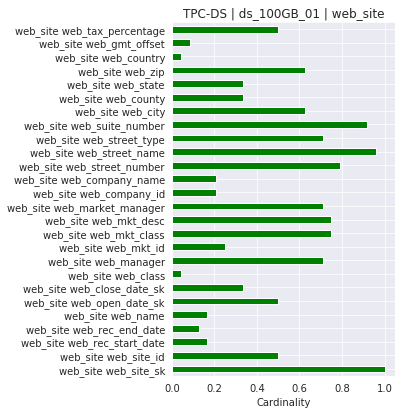

In [54]:
dataset_h = "ds_100GB_01"
csv_fp_h = "./results/ds_100GB_01_cardinality.csv"
df_h = pd.read_csv(csv_fp_h)
plot_cardinality(df=df_h, test="TPC-DS", dataset=dataset_h)